
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, popularity, genres, release_year, vote_average, and revenue.
Analysis of this data has been done in order to answer some questions.
>>    <ul>
>>    <li><a href="#Q1">Which genres are most popular from year to year?</a></li>
>>    <li><a href="#Q2">What kinds of properties are associated with movies that have high revenues?</a></li>
>>    <li><a href="#Q3">What are the top 10 movies?</a></li>
>>    <li><a href="#Q4">Which year has most production?</a></li>
>>    <li><a href="#Q5">Who are the top 10 directors based on number of  movies?</a></li>
>>    <ul>

In [1]:
# importing important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data
df= pd.read_csv('tmdb-movies.csv')
# Display all columns
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Check number of nan values in director column 
df['director'].isna().value_counts()

False    10822
True        44
Name: director, dtype: int64

In [6]:
# Check number of nan values in genres column 
df['genres'].isna().value_counts()

False    10843
True        23
Name: genres, dtype: int64

## Assesing

#### Data set has 10866 rows and 21 columns
- There are some columns that are not necessary in analysis like( id, imdb_id, cast, homepage, keywords,overview, budget,production_companies, tagline, release_year ) which can be droped. 
- release_year is int64 which should converted to string format
- release_date is string which should converted datetime format
- There are some missed data in (director, genres)  which is 44 in director column and 23 in genres column which can be dropped.
- genres have multi categories spaced by '|'.
- budget_adj and revenue_adj have 0 values which are unlogic it can replaced by mean value
- Dropping Dublicated rows

## Data Cleaning 

In [7]:
# Creat copy form data for cleaning 
df_clear= df.copy()

In [8]:
# Dropping unnecessary columns
df_clear.drop(columns=['id','imdb_id', 'cast', 'homepage', 'keywords','overview','tagline','production_companies', 'budget','revenue'] , inplace=True)

In [9]:
# Test Dropped columns code
df_clear.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
# convert release_date to datetime format
df_clear['release_date']=pd.to_datetime(df_clear['release_date'])
# convert release_year to string format
df_clear['release_year']=df_clear['release_year'].astype('str')

In [11]:
# Check data types formats
df_clear.dtypes

popularity               float64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year              object
budget_adj               float64
revenue_adj              float64
dtype: object

In [12]:
# Drop Nan from data set 
df_clear.dropna(inplace=True)

In [13]:
# Reset Dataframe indexing
df_clear.reset_index(drop=True, inplace=True)

In [14]:
# Check Dataframe 
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10801 non-null  float64       
 1   original_title  10801 non-null  object        
 2   director        10801 non-null  object        
 3   runtime         10801 non-null  int64         
 4   genres          10801 non-null  object        
 5   release_date    10801 non-null  datetime64[ns]
 6   vote_count      10801 non-null  int64         
 7   vote_average    10801 non-null  float64       
 8   release_year    10801 non-null  object        
 9   budget_adj      10801 non-null  float64       
 10  revenue_adj     10801 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 928.3+ KB


In [15]:
# split genres in multi rows
df_clear=df_clear.assign(genres=df_clear.genres.str.split('|')).explode('genres')

In [16]:
# check genres
df_clear.genres[0:10]

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
1          Adventure
1    Science Fiction
1           Thriller
2          Adventure
2    Science Fiction
Name: genres, dtype: object

In [17]:
# Replace zero values in budget_adj with mean value
df_clear['budget_adj'].replace(0 , df_clear['budget_adj'].mean(), inplace=True)  
# Replace zero values in revenue_adj with mean value
df_clear['revenue_adj'].replace(0 , df_clear['revenue_adj'].mean(), inplace=True)  

In [18]:
# Check data set 
df_clear.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,26869.000000,26869.000000,26869.000000,26869.000000,2.686900e+04,2.686900e+04
mean,0.707967,102.839741,250.756522,5.954193,3.154018e+07,9.337427e+07
std,1.116275,29.798366,638.901288,0.911261,3.366821e+07,1.521467e+08
min,0.000188,0.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,0.225687,90.000000,18.000000,5.400000,2.111085e+07,5.893706e+07
50%,0.412492,100.000000,44.000000,6.000000,2.111085e+07,6.108327e+07
75%,0.777510,112.000000,174.000000,6.600000,2.716921e+07,6.108327e+07
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [19]:
# Drop duplicated 
df_clear.drop_duplicates(inplace=True)

In [20]:
# Check duplicated
df_clear.duplicated().value_counts()

False    26864
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Q1- Which genres are most popular from year to year?

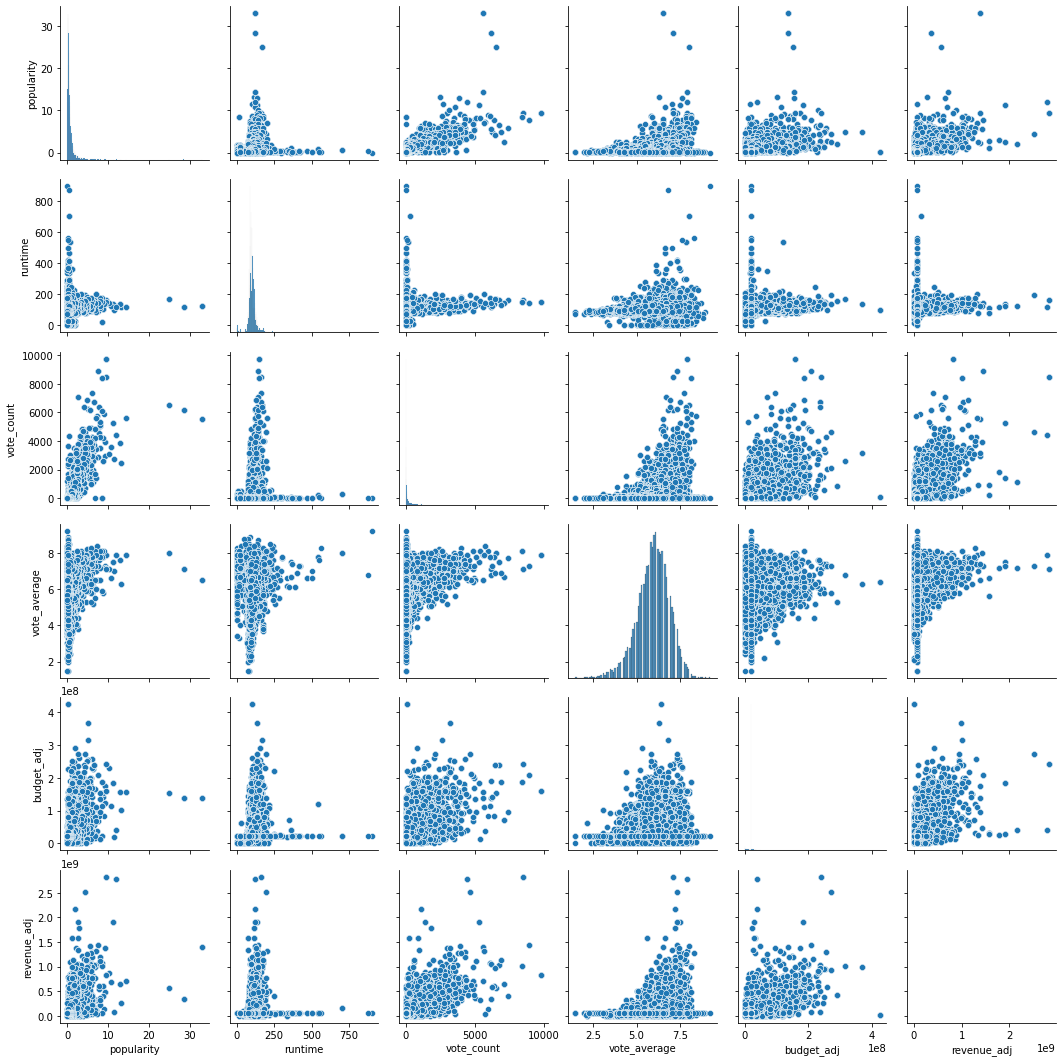

In [21]:
# Relation between each variable with another
sns.pairplot(df_clear)

In [22]:
df_genres=df_clear.groupby(['release_year','genres'], as_index=False).agg(counts=('genres', 'count'))
df_genres.head(2)

,release_year,genres,counts
0,1960,Action,8
1,1960,Adventure,5


Text(0.5, 1.0, 'fig(1) Most popular genres from year to another')

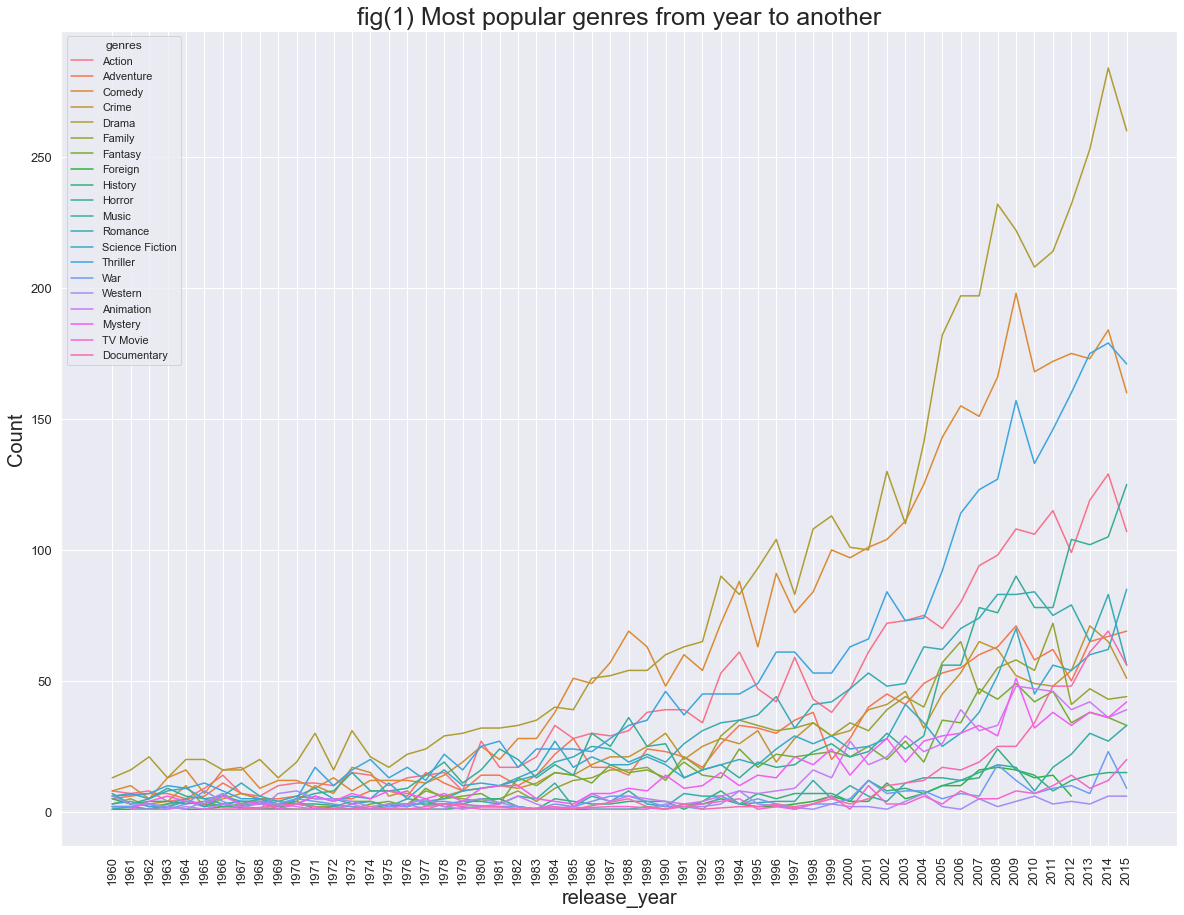

In [23]:
sns.set_context("poster")
sns.set_theme()
plt.figure(figsize=(20,15));
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('release_year', fontsize=20)
plt.ylabel('Count', fontsize=20)
fig=sns.lineplot(x='release_year' , y='counts',data =df_genres, hue='genres')
fig.set_title("fig(1) Most popular genres from year to another", fontsize=25)

Text(0.5, 1.0, 'fig(2) Most popular genres from year to another')

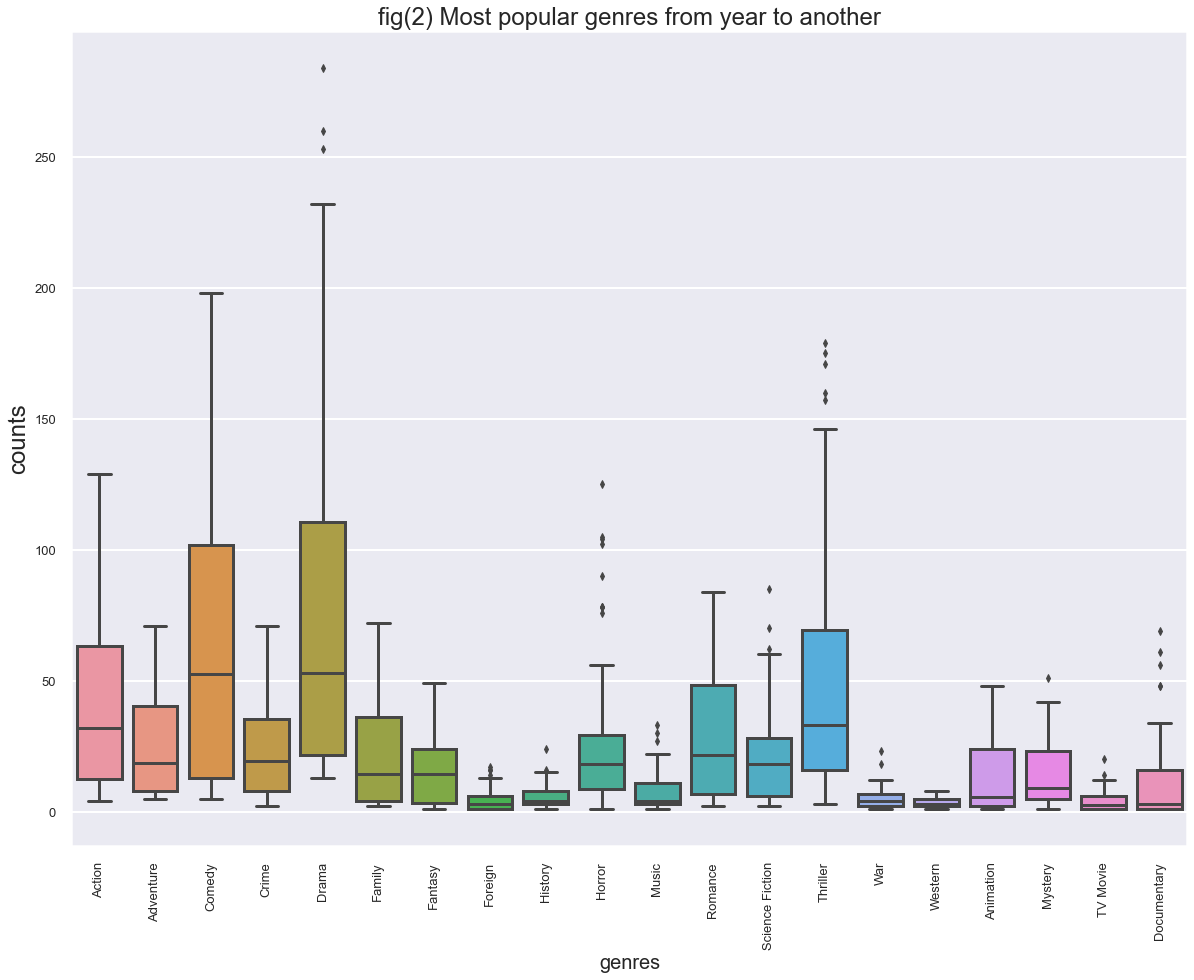

In [24]:
sns.set_context("poster")
plt.figure(figsize=(20,15));
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('release_year', fontsize=20)
plt.xlabel('Count', fontsize=20)
sns.boxplot(x='genres' , y='counts',data =df_genres)
plt.title('fig(2) Most popular genres from year to another')

## From figure 1 and figure 2 it can be concluded that Drama genre is the most popular genres from year to another

<a id='Q2'></a>
### Q2- What kinds of properties are associated with movies that have high revenues?

In [25]:
# check correlation between revenues and all numric data
x=df_clear._get_numeric_data()
x.corr()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.145061,0.794798,0.235303,0.476213,0.579210
runtime,0.145061,1.000000,0.177587,0.165918,0.220167,0.166890
vote_count,0.794798,0.177587,1.000000,0.280908,0.575185,0.691368
vote_average,0.235303,0.165918,0.280908,1.000000,0.104686,0.194461
budget_adj,0.476213,0.220167,0.575185,0.104686,1.000000,0.592973
revenue_adj,0.579210,0.166890,0.691368,0.194461,0.592973,1.000000


Text(0.5, 1.0, 'Correlation between revenue_adj and budget_adj')

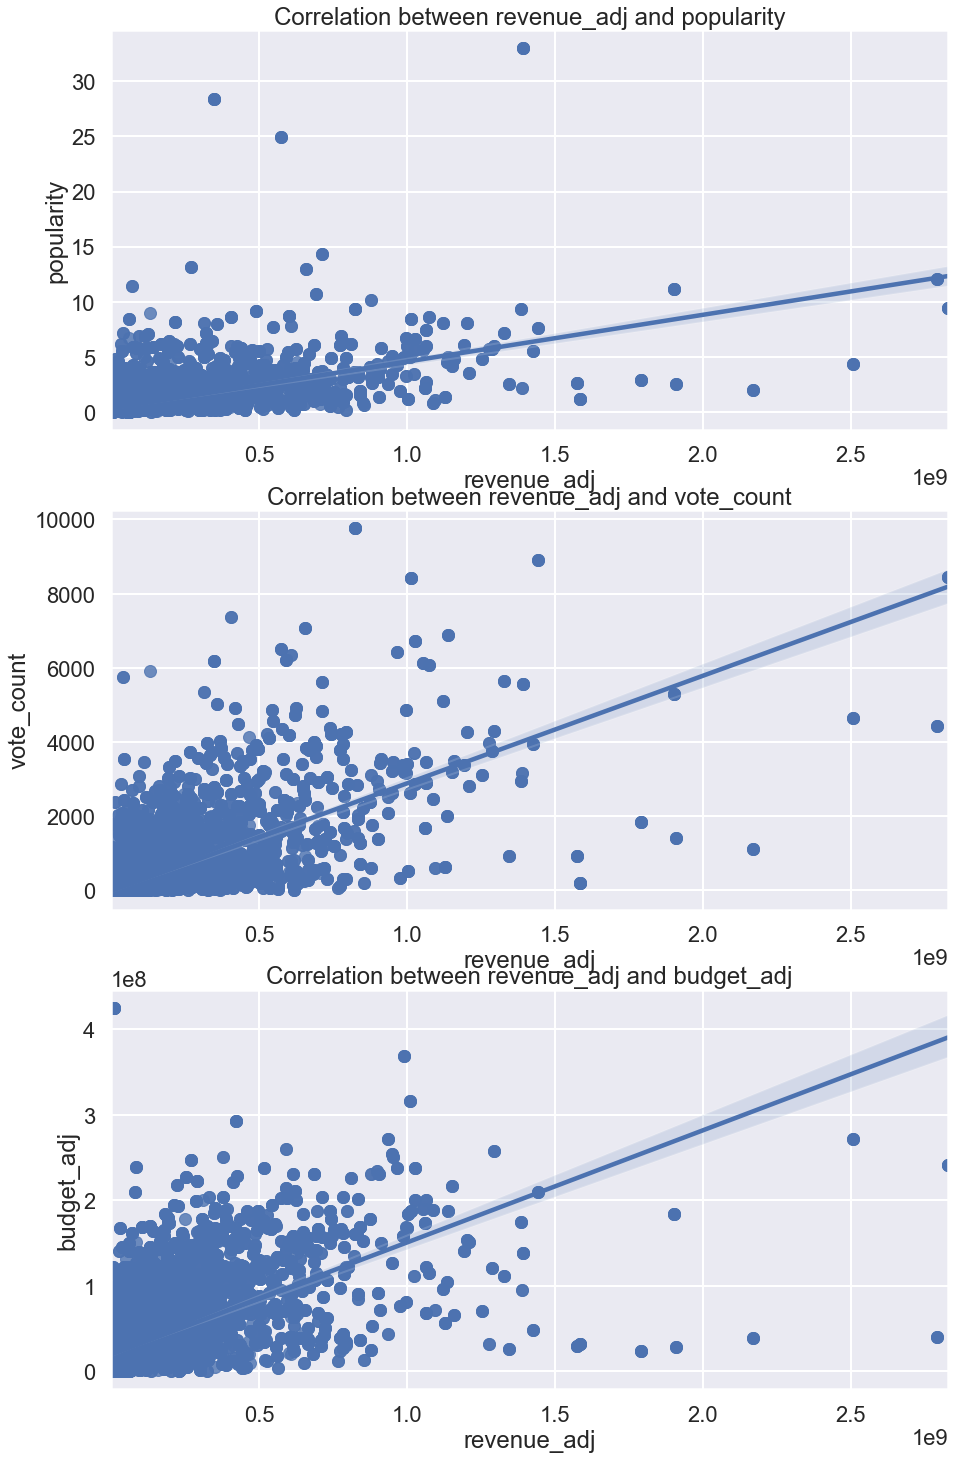

In [26]:
sns.set_context("poster")
plt.figure(figsize=(15,25))
plt.subplot(3,1,1)
f1=sns.regplot(x='revenue_adj',y='popularity', data=x, )
plt.title('Correlation between revenue_adj and popularity' )
plt.subplot(3,1,2)
f2=sns.regplot(x='revenue_adj',y='vote_count', data=x)
plt.title('Correlation between revenue_adj and vote_count' )
plt.subplot(3,1,3)
f3=sns.regplot(x='revenue_adj',y='budget_adj', data=x)
plt.title('Correlation between revenue_adj and budget_adj' )

### It can be concluded that revenue is affected by vote_count, popularity, and budget

In [27]:
df_clear.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='Q3'></a>
### Q3-What are the top 10 movies based on vote_average?

In [28]:
# Sort vote_average column
df_top_10=df.sort_values(by='vote_average', ascending=False)[0:10]
df_top_10.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0


Text(0.5, 1.0, 'Top 10 movies based on vote_average')

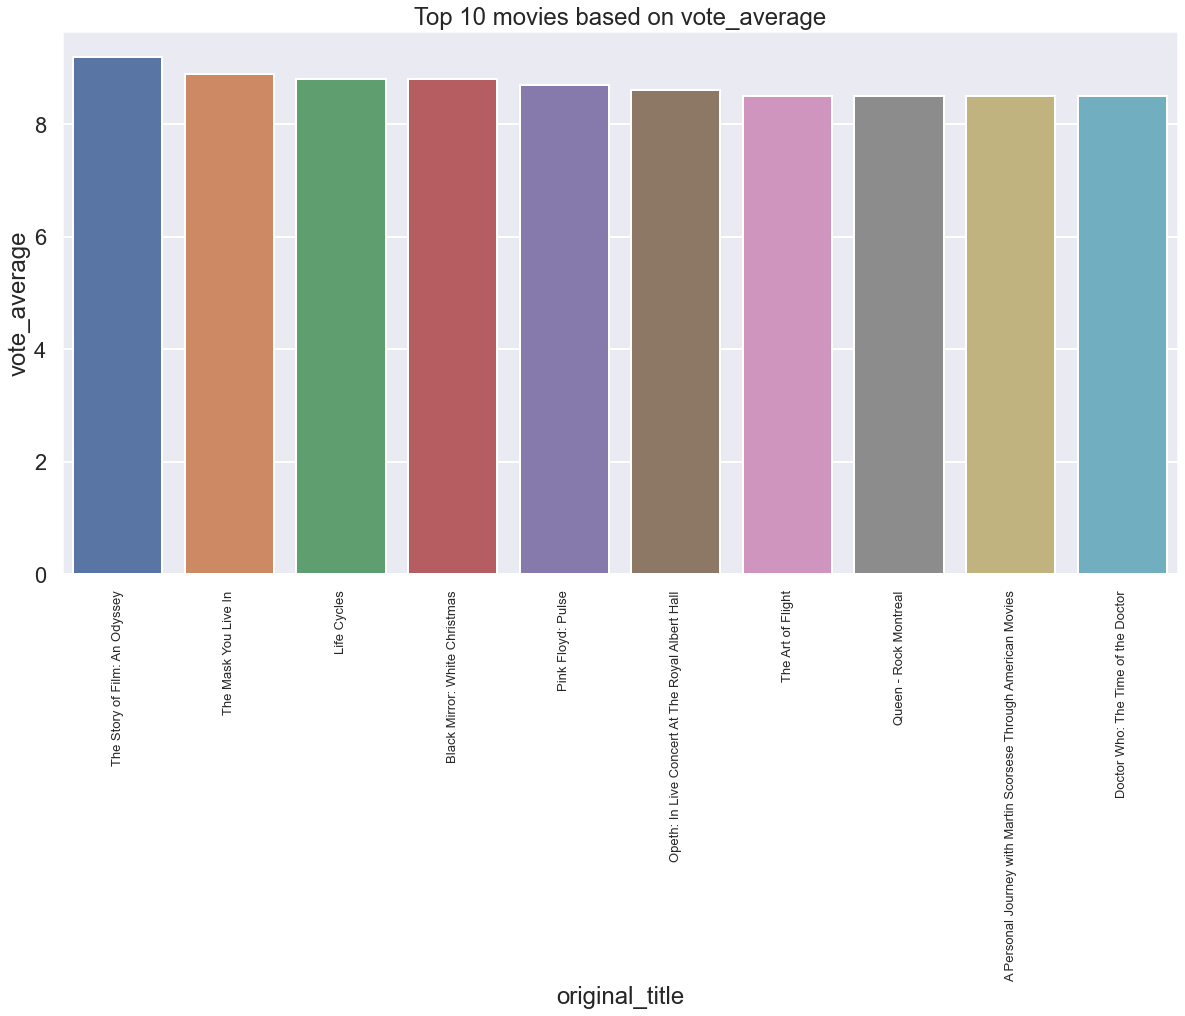

In [29]:
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=13)
sns.barplot(x=df_top_10['original_title'],y=df_top_10['vote_average']);
plt.title('Top 10 movies based on vote_average')

### The Story of Film: An Odyssey has the highest vote_avarage

<a id='Q4'></a>
### Q-4  Which year has most production?

In [30]:
df_most_year=df_clear.groupby('release_year', as_index=False).agg(counts=('release_year', 'count')).sort_values(by='counts', ascending=False)[0:10]
df_most_year_10= df_most_year[0:10]
df_most_year_10.head(2)
df_most_year_10.tail(2)

,release_year,counts
47,2007,1115
46,2006,1044


Text(0.5, 1.0, 'Years have most production')

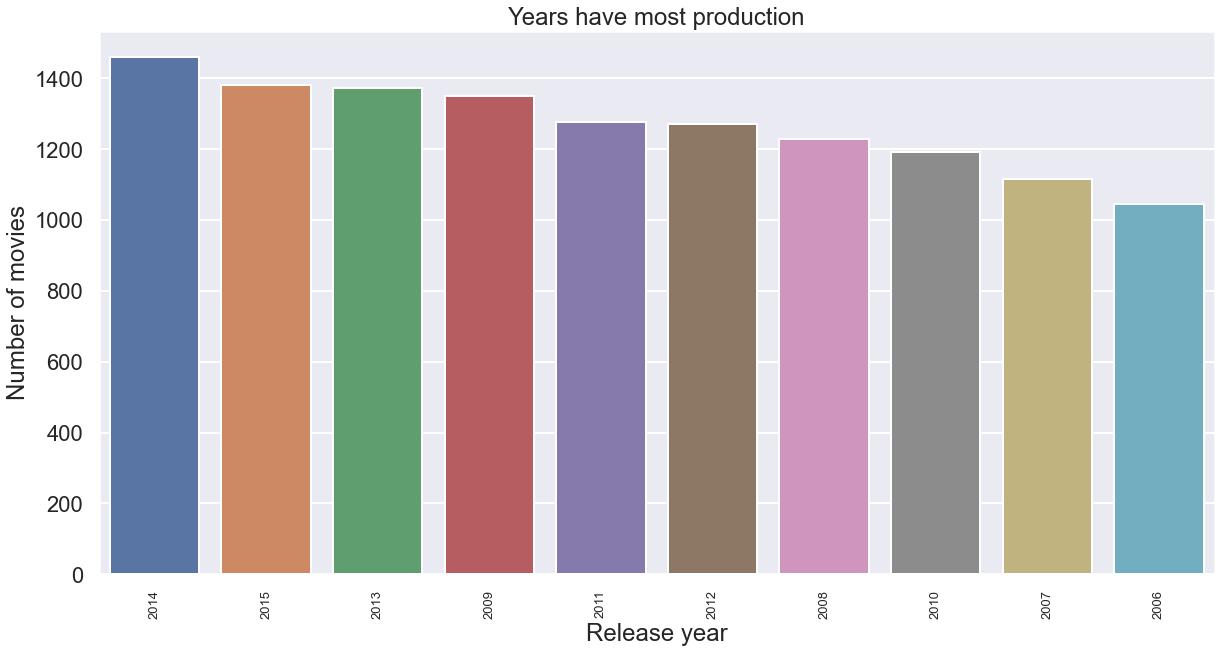

In [31]:
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=13)
sns.barplot(x=df_most_year_10['release_year'],y=df_most_year_10['counts']);
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.title('Years have most production')

### 2014 is the  year has the most production

<a id='Q5'></a>
### Q-5  Who are the top 10 directors based on number of movies?

In [32]:
df_director=df_clear.groupby('director', as_index=False).agg(counts=('director', 'count')).sort_values(by='counts', ascending=False)[0:10]
df_director.head(2)

,director,counts
4989,Woody Allen,105
876,Clint Eastwood,99


Text(0.5, 1.0, 'Top 10 directors based on number of movies')

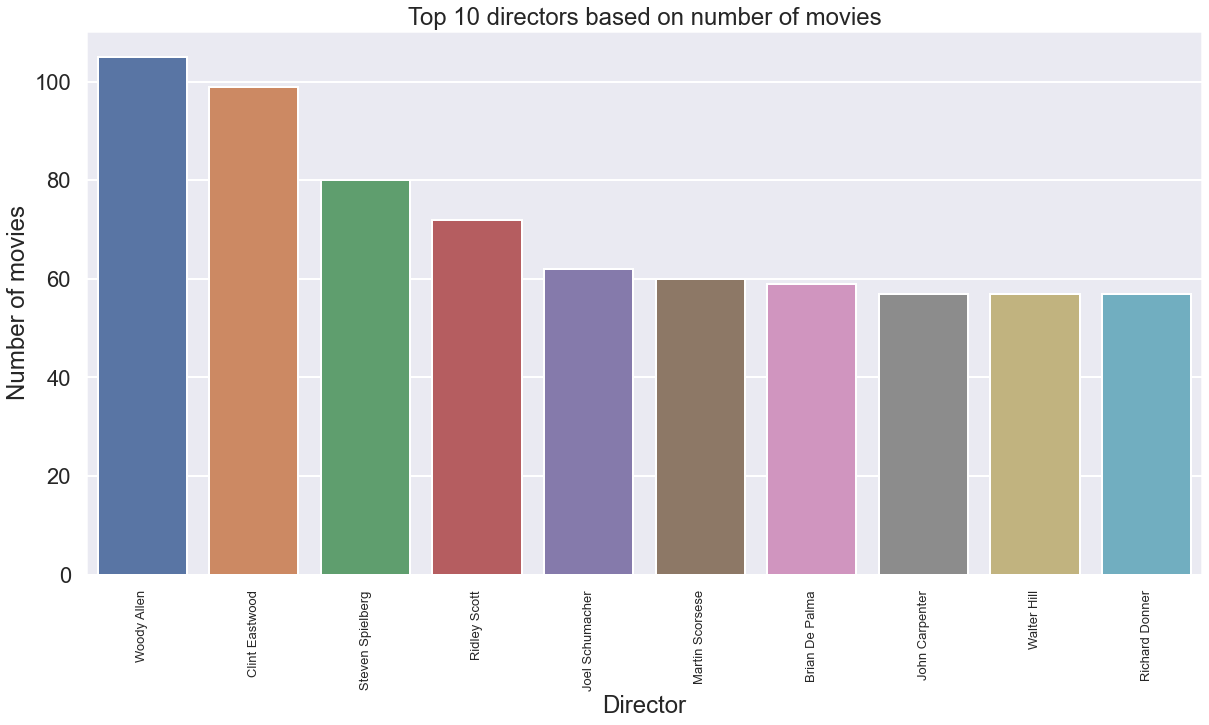

In [33]:
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=13)
sns.barplot(x=df_director['director'],y=df_director['counts']);
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.title('Top 10 directors based on number of movies')

###  Woody Allen has the most directed movies with 105 movies

<a id='conclusions'></a>
## Conclusions
### Results
- Drama genre is the most popular genres from year to another followed by comedy one, while the most unpopular genres is western.

- Budget, vote count, and popularity has high impact on revenue. On the other side run time impact is low.

- The top 10 movies are ( The Story of Film: An Odyssey, The Mask You Live In,  Life Cycles ,Black Mirror: White Christmas ,Pink Floyd: Pulse,  Opeth: In Live Concert At The Royal Albert Hall,  The Art of Flight, Queen - Rock Montreal, A Personal Journey with Martin Scorsese Throug..., Doctor Who: The Time of the Doctor ) based on vote avarage.

- 2014 is the year has the most production with 1461 movies while the lowest one is 2006 with 1044 movies 

- Woody Allen has the most directed movies with 105 movies

### Limitations
- For better data analysis, there are some improvement on data set should be done as, in budget_adj and revenue_adj columns there are many zero values which unlogical i replaced them by the mean which is not exact and defently affect the statistical calculations.
- In runtime column there are also many zero values which definitely affect the calculation when calculation the correlation between it and revenues.
- Genres column has many categories in one column that impel to separate them for statistical calculation which increase the data size.
- In director column there are some Nan  which could affect results in calculation of the top 10 directors